# t-SNE

t distributed stochastic neighborhood embedding

In [2]:
from sklearn import datasets
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import sqlite3
import nltk
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from scipy.linalg import eigh #linalg:linear algebra
%matplotlib inline


In [5]:
d0=pd.read_csv('mnist_train.csv')
d=StandardScaler().fit_transform(d0)

In [6]:
x=d[0:1000,:]
y=(d0['label'].values)[0:1000]
#taking only 1000 samples cause of time complexity issues (on whole dataset it would take 15-20 min)

In [7]:
m=TSNE(n_components=2,random_state=0) #n_components:Features
tsned=m.fit_transform(x)

In [8]:
tsnedd=pd.DataFrame(tsned,columns=['F1_dash','F2_dash'])
Y=pd.DataFrame(y,columns=['label'])
D=pd.concat([tsnedd,Y],axis=1)
D

,F1_dash,F2_dash,label
0,-0.021451,-0.869952,1
1,-15.623405,46.452366,0
2,16.094069,-7.324028,1
3,-19.559698,-24.570210,4
4,-19.169800,53.067398,0
5,-6.887752,38.097786,0
6,11.427964,-38.820496,7
7,-12.273769,-12.651071,3
8,-13.587445,-6.464955,5
9,-25.143768,8.715206,3


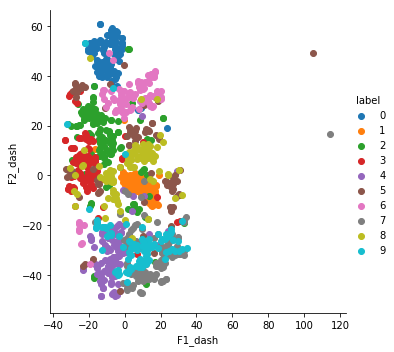

In [9]:
sns.FacetGrid(D,hue='label',height=5).map(plt.scatter,'F1_dash','F2_dash').add_legend()
plt.show()

# Visualizing IRIS dataset using t-SNE

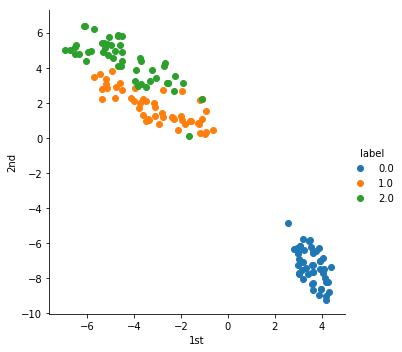

In [10]:
i = datasets.load_iris()
sd=StandardScaler().fit_transform(i.data)
m=TSNE(n_components=2,random_state=0,perplexity=50)
tsned=m.fit_transform(sd)
D=np.vstack((tsned.T,i.target)).T
DF=pd.DataFrame(data=D,columns=['1st','2nd','label'])
sns.FacetGrid(DF,hue='label',height=5).map(plt.scatter,'1st','2nd').add_legend()
plt.show()


# t-SNE

# Compare t-SNE with PCA

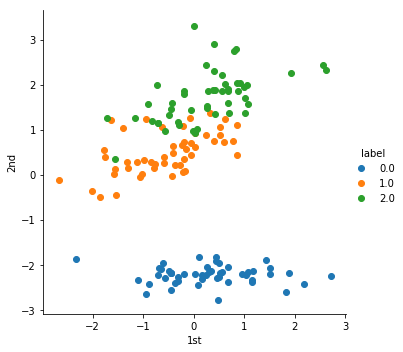

In [13]:
pca=decomposition.PCA()
pca.n_components=2  #need two directions only
pcad=pca.fit_transform(sd)
D=np.vstack((pcad.T,i.target)).T
DF=pd.DataFrame(data=D,columns=['2nd','1st','label'])
sns.FacetGrid(DF,hue='label',height=5).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

# PCA

t-SNE preformance is better than PCA